In [1]:
%config IPCompleter.greedy=True

In [2]:
# import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from sklearn.preprocessing import MinMaxScaler

from pandas import read_csv
from pandas import DataFrame
import pandas as pd
import matplotlib # plotting
from matplotlib import pyplot as plt

from numpy import zeros
from numpy import ones,array
from numpy.random import randn
from numpy.random import randint

In [4]:
df=read_csv('energydata_complete.csv', header=0, parse_dates=["date"], index_col="date")         

#Converting into datetime
df.index=pd.to_datetime(df.index,format='%d/%m/%Y %H.%M.%S')

In [5]:
df.shape

(19735, 28)

In [6]:
df.head(10)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702


In [7]:
df.isnull().sum()


Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
df.index.isnull().sum()

0

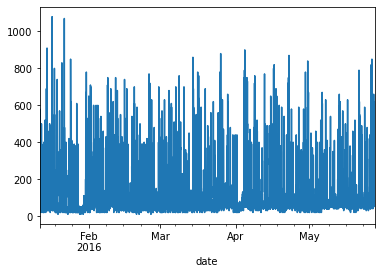

In [9]:
df['Appliances'].plot()
plt.show()

In [10]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [11]:
#window_size=3
step_size=3
df_reframed=series_to_supervised(df,step_size,1)
#df_reframed=series_to_supervised(df,step_size,1)
print(df_reframed.shape)
df_reframed.head(10)
new_latent_dim=df_reframed.shape[1]
new_n_batch=df_reframed.shape[0]


(19732, 112)


In [12]:
# drop columns we don't want to predict
# cols = [30:56]
# df_reframed.drop(df_reframed.columns[cols], axis =1 , inplace=True)
df_reframed.drop(['var28(t)','var27(t)','var26(t)','var25(t)','var24(t)','var23(t)','var22(t)','var21(t)','var20(t)','var19(t)','var18(t)','var17(t)','var16(t)','var15(t)','var14(t)','var13(t)',
'var12(t)','var11(t)','var10(t)','var9(t)','var8(t)','var7(t)','var6(t)','var5(t)','var4(t)','var3(t)','var2(t)'] ,axis=1, inplace=True)
print(df_reframed.head(5))
#df.drop(['A'], axis = 1)

                     var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  \
date                                                                         
2016-01-11 17:30:00       60.0       30.0      19.89  47.596667       19.2   
2016-01-11 17:40:00       60.0       30.0      19.89  46.693333       19.2   
2016-01-11 17:50:00       50.0       30.0      19.89  46.300000       19.2   
2016-01-11 18:00:00       50.0       40.0      19.89  46.066667       19.2   
2016-01-11 18:10:00       60.0       40.0      19.89  46.333333       19.2   

                     var6(t-3)  var7(t-3)  var8(t-3)  var9(t-3)  var10(t-3)  \
date                                                                          
2016-01-11 17:30:00  44.790000      19.79  44.730000  19.000000   45.566667   
2016-01-11 17:40:00  44.722500      19.79  44.790000  19.000000   45.992500   
2016-01-11 17:50:00  44.626667      19.79  44.933333  18.926667   45.890000   
2016-01-11 18:00:00  44.590000      19.79  45.000000  18.8

In [13]:
#Standardization
scaler = MinMaxScaler(feature_range=(-1, 1))
reframed_scaled = scaler.fit_transform(df_reframed.values)
print(reframed_scaled[800])
#type(reframed_scaled)

[-0.92523364 -1.         -0.11087645 -0.26373727 -0.40392537  0.06186147
 -0.33532735  0.2955289  -0.15495495  0.22193769 -0.45150502 -0.28172614
 -0.60228982  0.9223458  -0.24599434  0.26713948 -0.21391517  0.37765593
 -0.39646202  0.37913907 -0.6505895   0.62170543  0.9122807  -0.57142857
 -0.16923077 -0.40573152  0.71746404  0.71746404 -0.94392523 -1.
 -0.11087645 -0.26373727 -0.4087715   0.06495454 -0.33532735  0.2955289
 -0.15495495  0.2240717  -0.45150502 -0.28172614 -0.60228982  0.92295248
 -0.24599434  0.2713948  -0.21391517  0.37765593 -0.38258758  0.39072848
 -0.64951768  0.62325581  0.90789474 -0.57142857 -0.16923077 -0.40723982
 -0.93132327 -0.93132327 -0.92523364 -1.         -0.1186202  -0.26190258
 -0.4087715   0.06495454 -0.35194417  0.30238355 -0.16576577  0.21553564
 -0.45150502 -0.28255313 -0.60617086  0.92295248 -0.24599434  0.27659574
 -0.21391517  0.37262966 -0.38258758  0.39072848 -0.64844587  0.6248062
  0.90350877 -0.57142857 -0.16923077 -0.40874811  0.94212293 

In [14]:
# split into train and test sets
train = int(len(reframed_scaled) * 0.80)
test_size = len(reframed_scaled) - train
train, test = reframed_scaled[0:train,:], reframed_scaled[train:len(reframed_scaled),:]
print(train.shape)
print(test.shape)


(15785, 85)
(3947, 85)


In [15]:
#n= size of training data i.e batch here and n_test=size of test data i.e batch
n_train=len(train)
print(n_train)
n_test=len(test)
print(n_test)

15785
3947


In [16]:
train_X, train_Y = train[:n_train], train[:, -1] 
test_X, test_Y = test[:, :n_test], test[:, -1] 
print(train_X.shape, len(train_X), train_Y.shape) 
print(test_X.shape, len(test_X), test_Y.shape)
# print(train_X,train_Y)
# print(train_X.shape[0])
# print(train_X.shape[1])


(15785, 85) 15785 (15785,)
(3947, 85) 3947 (3947,)


In [17]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Reshape, Flatten, Dense, Activation, Dropout, concatenate,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras import metrics
from matplotlib import pyplot

from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
import pandas as pd
import matplotlib # plotting

from numpy import zeros
from numpy import ones,array
from numpy.random import randn
from numpy.random import randint

In [18]:
######################## Defining Discriminator Model ########################## 
def build_discriminator():
    model = Sequential(name="DISCRIMINATOR" )
    model.add(LSTM(164, name="DIS_HL_1", input_shape=(1,train_X.shape[1]) ,return_sequences = True))
    model.add(LeakyReLU(alpha=0.3))
    model.add(BatchNormalization(momentum=0.3))
    model.add(Dense(64, name="DIS_HL_2"))
    model.add(LeakyReLU(alpha=0.3))
    model.add(BatchNormalization(momentum=0.3))
    model.add(Dense(32, name="DIS_HL_3"))
    model.add(LeakyReLU(alpha=0.3))
    model.add(BatchNormalization(momentum=0.3))
    model.add(Dense(1, activation='sigmoid', name="DIS_OUT"))
    # compile model with L2 loss
    model.compile(loss='bce', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    #model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=[metrics.RootMeanSquaredError()])
    model.summary()
    return model
#build_discriminator

In [19]:
######################## Defining Generator Model ########################## 
def build_generator():
    model = Sequential(name="GENERATOR")
    model.add(LSTM(264, name="GEN_HL_1", input_shape=(1,train_X.shape[1]),return_sequences = True ))
    model.add(LeakyReLU(alpha=0.3))
    model.add(BatchNormalization(momentum=0.3))
    model.add(Dense(212, name="GEN_HL_2"))
    model.add(LeakyReLU(alpha=0.3))
    model.add(BatchNormalization(momentum=0.3))
    model.add(Dense(164, name="GEN_HL_3"))
    model.add(LeakyReLU(alpha=0.3))
    model.add(BatchNormalization(momentum=0.3))
    model.add(Dense(train_X.shape[1], name="GEN_OUT"))
    model.add(Activation('tanh'))
    model.summary()
    return model


In [20]:
def build_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
     # compile model
    model.compile(loss='bce', optimizer= Adam(lr=0.0002, beta_1=0.5))#, metrics=[metrics.RootMeanSquaredError()] ) 
    return model

In [21]:
# create the generator
generator = build_generator()
# create the discriminator
discriminator = build_discriminator()
# create the gan
gan_model = build_gan(generator, discriminator)
# summarize gan model
gan_model.summary()


Model: "GENERATOR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 GEN_HL_1 (LSTM)             (None, 1, 264)            369600    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1, 264)            0         
                                                                 
 batch_normalization (BatchN  (None, 1, 264)           1056      
 ormalization)                                                   
                                                                 
 GEN_HL_2 (Dense)            (None, 1, 212)            56180     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1, 212)            0         
                                                                 
 batch_normalization_1 (Batc  (None, 1, 212)           848       
 hNormalization)                                         

C:\Users\hzahid\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "DISCRIMINATOR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 DIS_HL_1 (LSTM)             (None, 1, 164)            164000    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 1, 164)            0         
                                                                 
 batch_normalization_3 (Batc  (None, 1, 164)           656       
 hNormalization)                                                 
                                                                 
 DIS_HL_2 (Dense)            (None, 1, 64)             10560     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 1, 64)             0         
                                                                 
 batch_normalization_4 (Batc  (None, 1, 64)            256       
 hNormalization)                                     

In [22]:
def generate_latent_points(latent_dim, n_batch):
  
    # generate points in the latent space
    rnd = np.random.RandomState(42)
    z_input = rnd.randn(latent_dim * n_batch)
    print(z_input.shape)
    # reshape into a batch of inputs for the network
    z_input = z_input.reshape(n_batch, latent_dim)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    z_scaled = scaler.fit_transform(z_input)
    return z_scaled

In [23]:
# Associate n real samples with class labels
def generate_real_samples(train,n):
    ix= randint(0,train.shape[0],n)
    #print(ix)
    X=train[ix]
    y = ones((n, 1))
    #X = reframed_scaled[:n, :]
    return X, y

In [24]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
    z_input = generate_latent_points(latent_dim,n)
    #print("z_input",z_input.shape)
    z_input = z_input.reshape(len(z_input),1,train_X.shape[1])
    X  = generator.predict(z_input)
    #print("x_fake_Z_input", X.shape)
    # create class labels
    y_fake_GAN = zeros((n, 1))
# create class labels
    y = zeros((n, 1))
    return X, y

In [25]:
# use the generator to generate n fake examples, with class labels
def generate_fake_Testsamples(generator, latent_dim, n):
    z_input = generate_latent_points(latent_dim,n)
    #print("z_input",z_input.shape)
    z_input = z_input.reshape(len(z_input),1,test_X.shape[1])
    X  = generator.predict(z_input)
    #print("x_fake_Z_input", X.shape)
    # create class labels
    y_fake_GAN = zeros((n, 1))
# create class labels
    y = zeros((n, 1))
    return X, y

In [26]:
# evaluate the discriminator and plot real and fake points on test data

d1_hist, d2_hist, d1_acc_list, d2_acc_list =list(),list(),list(),list()
def test_performance(epoch, generator, discriminator, latent_dim=test_X.shape[1]):
    
    # prepare real samples
    n_batch = n_test
    
    # prepare real samples for testing
    x_real_test, y_real_test = test_X, ones((n_batch, 1)) 
    
    dis_real = x_real_test.reshape(n_batch,1,test_X.shape[1])
    #print("x_real_test",dis_real[15:])
    
    # evaluate discriminator on real examples
    d_testLoss_real, acc_real_test = discriminator.evaluate(dis_real , y_real_test, verbose=0)

    # prepare fake examples
    dis_fake, y_fake_test= generate_fake_Testsamples(generator,latent_dim,n_batch)
    #print("x_fake_test",dis_fake[15:])
    
    # evaluate discriminator on fake examples
    d_testLoss_fake, acc_fake_test = discriminator.evaluate(dis_fake, y_fake_test, verbose=0)
    print('Test Loss Values')
    print('>%d, d1=%.3f, d2=%.3f , rmse1= %.3f, rmse2=%.3f' %(epoch,d_testLoss_real, d_testLoss_fake, acc_real_test,
                                                              acc_fake_test))
 
                     
    dis_real_x = dis_real.reshape(len(dis_real),test_X.shape[1])
    real = scaler.inverse_transform(dis_real_x)                     
    print("real test",dis_real_x.shape)
    dis_fake_x = dis_fake.reshape(len(dis_fake) ,test_X.shape[1])
    print("dis_fake_x after reshape",dis_fake_x.shape)     
    fake=scaler.inverse_transform(dis_fake_x)
    #print(np.round(fake[0:25],1)) # Need to roundoff noise/random points even after transform 
    RMSE_Disc = math.sqrt(mean_squared_error(dis_real_x, dis_fake_x))
    print('Test RMSE : %.3f' % RMSE_Disc)
    MSE = mean_squared_error(dis_real_x , dis_fake_x)     
    print('Test MSE : %.3f' %MSE)
    MAPE_O2 = np.mean(np.abs((dis_real_x - dis_fake_x) / dis_real_x))
    print('Test MAPE = %.3f' %(MAPE_O2))
    MAE = mean_absolute_error(dis_real_x, dis_fake_x)
    print('Test MAE = %.3f' %(MAE))
            
    correlation_matrix = np.corrcoef(dis_real_x,dis_fake_x)
    correlation_xy = correlation_matrix[0,1]        
    r_squared = correlation_xy**2
    print('Test R-Squared = %.3f' %(r_squared))
   
# # summarize discriminator performance
    #print("Test performance")
    fig = plt.figure(figsize=(6,6))
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.plot(test_Y , label='TrueData')
    ax1.set_title('Test Real/fake Time SeriesData Plot')
    ax1.legend()
    plt.show()
    
    fig = plt.figure(figsize=(6,6))
    ax2 = fig.add_subplot(2, 1, 1)
    ax2.plot(fake[:,-1], label='fakeData')
    ax2.legend()    
    plt.show()
    
    print("Test Probabilites")  
    kl,js = calculate_probabilities(dis_fake_x,dis_real_x)
    return(d_testLoss_fake, acc_fake_test, d_testLoss_real, acc_real_test,RMSE_Disc,MAE,r_squared,kl,js)   
   


In [27]:
# prepare lists for storing stats each iteration
d1_hist, d2_hist, g_hist, a1_hist, a2_hist, = list(), list(), list(), list(), list()
d1_acc_list, d2_acc_list = list(), list()
rmse_list,mae_list,Rsquared_list,kl_list,js_list=list(), list(),list(), list(),list()

In [28]:
t1_hist, t2_hist,t1_acc_list, t2_acc_list = list(), list(), list(), list()
rmse_Tlist,mae_Tlist,Rsquared_Tlist, kl_Tlist, js_Tlist=list(), list(),list() , list(), list()

In [29]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from scipy.special import kl_div
from scipy.spatial.distance import jensenshannon
from numpy import loadtxt 
from openpyxl import Workbook
from openpyxl import load_workbook


def training(g_model, d_model, gan_model, latent_dim=train_X.shape[1], n_epochs=50, n_batch=64, n_eval=10,t_eval=100):
    
    X_train = train_X.reshape(train_X.shape[0],1,train_X.shape[1])
    
    #print(X_train.shape)
    # manually enumerate epoch OTHERWISE use formula (dataset_size/n_batch)
    
    half_batch = int(n_batch/2)
    
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real_GAN = generate_real_samples(X_train,half_batch)
        #print("x_real",x_real.shape)
                    
        # prepare fake examples
        x_fake, y_fake_GAN = generate_fake_samples(g_model,latent_dim,half_batch)
        #print("x_fake",x_fake.shape)     
         # update discriminator
        d_loss1, d_acc1 = d_model.train_on_batch(x_real, y_real_GAN)
        d_loss2, d_acc2 = d_model.train_on_batch(x_fake, y_fake_GAN)        
           
         
        # update the generator via the discriminator's error
        x_gan = generate_latent_points(latent_dim,n_batch)
        x_gan = x_gan.reshape(n_batch,1,train_X.shape[1])
        #print(x_gan.shape)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1)) 
        
        g_loss = gan_model.train_on_batch(x_gan, y_gan)  
        
                    
        # record history
        d1_hist.append(d_loss1)
        d2_hist.append(d_loss2)
        g_hist.append(g_loss)
        d1_acc_list.append(d_acc1)
        d2_acc_list.append(d_acc2)
                
        
        print('>%d, d1=%.3f, d2=%.3f , g=%.3f, acc1=%.3f, acc2=%.3f' %(i+1, d_loss1, d_loss2, g_loss, d_acc1, d_acc2)) 
        ########################Transformation#######################
        gen_x_real=x_real.reshape(len(x_real),train_X.shape[1])
        real = scaler.inverse_transform(gen_x_real)
         #print("real after transformation", real[-1])
         #print( print("real after transformation", real.shape)
            
            #print("gen_x_fake",gen_x_fake.shape)
        x_fake = x_fake.reshape(len(x_fake),train_X.shape[1])
        fake = scaler.inverse_transform(x_fake)
        #print("fake after transformation", np.round(fake[-1],1))                   
                       
        #print("x_fake", x_fake.shape)    
        #print("gen_x_real", gen_x_real.shape)    
        RMSE_Disc = math.sqrt(mean_squared_error(gen_x_real, x_fake))
        print('TRAIN RMSE : %.3f' % RMSE_Disc)
        rmse_list.append(RMSE_Disc)
            
        MSE = mean_squared_error(gen_x_real, x_fake)     
        print('TRAIN MSE : %.3f' %MSE)
        MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))
        print('Train MAPE = %.3f' %(MAPE_01))
        MAE = mean_absolute_error(gen_x_real, x_fake)
        print('Train MAE = %.3f' %(MAE))
        mae_list.append(MAE)
            
        correlation_matrix = np.corrcoef(gen_x_real,x_fake)
        correlation_xy = correlation_matrix[0,1]        
        r_squared = correlation_xy**2
        print(' Train R-Squared  = %.3f' %(r_squared))
        Rsquared_list.append(r_squared)
            
        gen_x_real = np.array(gen_x_real).flatten() 
        x_fake = np.array(x_fake).flatten()
        #
        print("Train Probabilites")
        kl,js = calculate_probabilities(x_fake,gen_x_real)
        kl_list.append(kl)
        js_list.append(js)
        
        # evaluate the model every n_eval 10/100 epochs on test data
          # evaluate the model every n_eval 10/100 epochs on test data
        if (i+1) % n_eval == 0:
            plot_trainingLoss(d1_hist, d2_hist, g_hist)
            plot_RMSELoss(d1_acc_list,d2_acc_list)
            
            #this output of generator is used to compare the PDFs of GEN's output and real data
            x_fake_new, y_fake_GAN = generate_fake_samples(g_model,latent_dim,train_X.shape[0])
            x_fake_new = x_fake_new.reshape(len(x_fake_new),train_X.shape[1])
                        
            print("Train Performance")
            fig = plt.figure(figsize=(6,6))
            ax1 = fig.add_subplot(2, 1, 1)
            ax1.plot(train_Y , label='TrueData')
            ax1.set_title('Line Real/fake Time SeriesData Plot')
            ax1.legend() 
            plt.show()
             
            fig = plt.figure(figsize=(6,6))
            ax2 = fig.add_subplot(2, 1, 1)
            ax2.plot(x_fake_new[:,-1], label='fakeData')
            ax2.legend() 
            plt.show()
            
   
            ########################Transformation#######################
#             #print("gen_x_real shape",gen_x_real.shape)   
#             gen_x_real=x_real.reshape(len(x_real),train_X.shape[1])
#             real = scaler.inverse_transform(gen_x_real)
#             #print("real after transformation", real[-1])
#             #print( print("real after transformation", real.shape)
            
#             #print("gen_x_fake",gen_x_fake.shape)
#             x_fake = x_fake.reshape(len(x_fake),train_X.shape[1])
#             fake = scaler.inverse_transform(x_fake)
#             #print("fake after transformation", np.round(fake[-1],1))                   
                       
#             #print("x_fake", x_fake.shape)    
#             #print("gen_x_real", gen_x_real.shape)    
#             RMSE_Disc = math.sqrt(mean_squared_error(gen_x_real, x_fake))
#             print('TRAIN RMSE : %.3f' % RMSE_Disc)
#             rmse_list.append(RMSE_Disc)
            
#             MSE = mean_squared_error(gen_x_real, x_fake)     
#             print('TRAIN MSE : %.3f' %MSE)
            
#             MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))
#             print('Train MAPE = %.3f' %(MAPE_01))
            
#             MAE = mean_absolute_error(gen_x_real, x_fake)
#             print('Train MAE = %.3f' %(MAE))
#             mae_list.append(MAE)
            
#             correlation_matrix = np.corrcoef(gen_x_real,x_fake)
#             correlation_xy = correlation_matrix[0,1]        
#             r_squared = correlation_xy**2
#             print(' Train R-Squared  = %.3f' %(r_squared))
#             Rsquared_list.append(r_squared)
            
#             gen_x_real = np.array(gen_x_real).flatten() 
#             x_fake = np.array(x_fake).flatten()
         
#             print("Train Probabilites")
#             kl, js = calculate_probabilities(x_fake,gen_x_real)
#             kl_list.append(kl)
#             js_list.append(js)
            
            ###########################Test Performance#######################                      
            print("**********Testing Starts Here***************....")
            
            d_testLoss_fake, acc_fake_test, d_testLoss_real, acc_real_test,RMSE_Disc,MAE,r_squared,kl,js = test_performance(i, g_model,
                                                                                                               d_model, latent_dim)
            #print("dis_real, dis_fake ",dis_real.shape,dis_fake.shape)
            t1_hist.append(d_testLoss_real)
            t2_hist.append(d_testLoss_fake)
            t1_acc_list.append(acc_real_test)
            t2_acc_list.append(acc_fake_test)
            
            rmse_Tlist.append(RMSE_Disc)
            mae_Tlist.append(MAE)
            Rsquared_Tlist.append(r_squared)
            kl_Tlist.append(kl)
            js_Tlist.append(js)
            
  

In [30]:
import numpy as np
from scipy.stats import norm
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns

sns.set()

def calculate_probabilities(x_fake,gen_x_real):

#     def kl_divergence(p, q):
#         return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# calculate parameters
    sample_mean1 = mean(gen_x_real)
    sample_std1 = std(gen_x_real)
    #print("real data: ", gen_x_real[0:100])
    print('Mean_real=%.3f, Standard Deviation_real=%.3f' % (sample_mean1, sample_std1))

# define the distribution
    x_d = np.linspace(-1, 1, 100)
    probabilities1 = norm(sample_mean1, sample_std1).pdf(x_d) 

# calculate parameters
    sample_mean2 = mean(x_fake)
    sample_std2 = std(x_fake)
    #print("x_fake: ", x_fake)
    print('Mean_fake=%.3f, Standard Deviation_fake=%.3f' % (sample_mean2, sample_std2))

# define the distribution
    x_d = np.linspace(-1, 1, 100)
    probabilities2 = norm(sample_mean2, sample_std2).pdf(x_d) 

    kl = sum(kl_div(probabilities2,probabilities1))
    js = jensenshannon(probabilities2,probabilities1)  
    print('KL(P || Q): %.3f' % kl)
    print('JS(P || Q) :%.3f'  % js)
 
    
    #print("Training Loss")
    pyplot.figure(figsize=(8,8))
    pyplot.title('probabilities plot')
    pyplot.subplot(2,1,1)   
    pyplot.plot(np.arange(100), probabilities1, c='red', label='real')
    pyplot.plot(np.arange(100), probabilities2, c='blue', label='fake')
    pyplot.legend()
    pyplot.show()
             
    return(kl,js)         
    

In [31]:
def plot_trainingLoss(d1_hist, d2_hist, g_hist):
# plot loss
      print("Training Loss")
      pyplot.figure(figsize=(8,8))
      pyplot.title('Line Loss')
      pyplot.subplot(2,1,1)   
      pyplot.plot(d1_hist, label='d-real')
      pyplot.plot(d2_hist, label='d-fake')
      pyplot.plot(g_hist, label='gen')
      pyplot.legend()
      pyplot.show()             

In [32]:
def plot_RMSELoss(d1_acc_list,d2_acc_list):
    print("Training RMSE")
    plt.figure(figsize=(8,8))
    plt.title('RMSE')
    plt.subplot(2,1,1)   
    plt.plot(d1_acc_list, label='real')
    plt.plot(d2_acc_list, label='fake')
    plt.legend()
    plt.show() 

(2720,)
(5440,)
>1, d1=0.810, d2=0.830 , g=0.785, acc1=0.531, acc2=0.562
TRAIN RMSE : 0.463
TRAIN MSE : 0.214
Train MAPE = inf
Train MAE = 0.374
 Train R-Squared  = 0.425
Train Probabilites
Mean_real=-0.178, Standard Deviation_real=0.428
Mean_fake=-0.000, Standard Deviation_fake=0.024
KL(P || Q): 121.230
JS(P || Q) :0.722


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


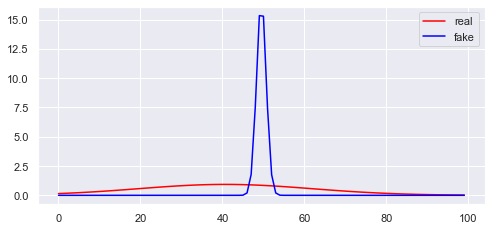

(2720,)
(5440,)
>2, d1=0.769, d2=0.797 , g=0.686, acc1=0.469, acc2=0.500
TRAIN RMSE : 0.553
TRAIN MSE : 0.305
Train MAPE = inf
Train MAE = 0.447
 Train R-Squared  = 0.002
Train Probabilites
Mean_real=-0.149, Standard Deviation_real=0.454
Mean_fake=-0.006, Standard Deviation_fake=0.257
KL(P || Q): 12.233
JS(P || Q) :0.266


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


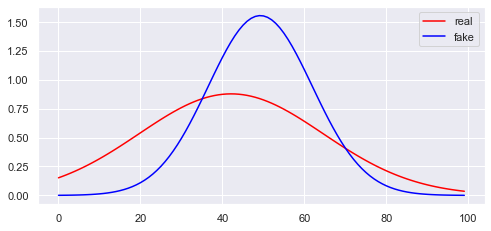

(2720,)
(5440,)
>3, d1=0.785, d2=0.770 , g=0.366, acc1=0.500, acc2=0.531
TRAIN RMSE : 0.612
TRAIN MSE : 0.374
Train MAPE = inf
Train MAE = 0.501
 Train R-Squared  = 0.321
Train Probabilites
Mean_real=-0.142, Standard Deviation_real=0.447
Mean_fake=0.007, Standard Deviation_fake=0.371
KL(P || Q): 3.400
JS(P || Q) :0.136


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


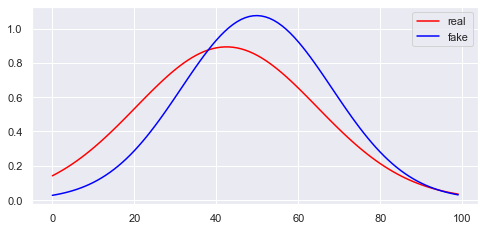

(2720,)
(5440,)
>4, d1=0.739, d2=0.743 , g=0.175, acc1=0.531, acc2=0.500
TRAIN RMSE : 0.651
TRAIN MSE : 0.423
Train MAPE = inf
Train MAE = 0.531
 Train R-Squared  = 0.122
Train Probabilites
Mean_real=-0.159, Standard Deviation_real=0.440
Mean_fake=0.014, Standard Deviation_fake=0.429
KL(P || Q): 3.291
JS(P || Q) :0.130


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


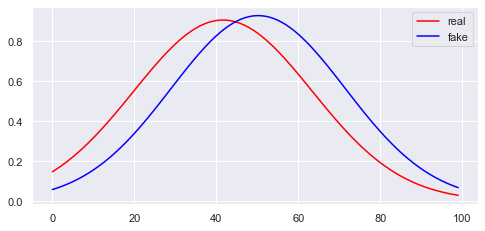

(2720,)
(5440,)
>5, d1=0.778, d2=0.727 , g=0.186, acc1=0.438, acc2=0.469
TRAIN RMSE : 0.705
TRAIN MSE : 0.496
Train MAPE = inf
Train MAE = 0.580
 Train R-Squared  = 0.109
Train Probabilites
Mean_real=-0.162, Standard Deviation_real=0.459
Mean_fake=0.017, Standard Deviation_fake=0.492
KL(P || Q): 3.097
JS(P || Q) :0.124


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


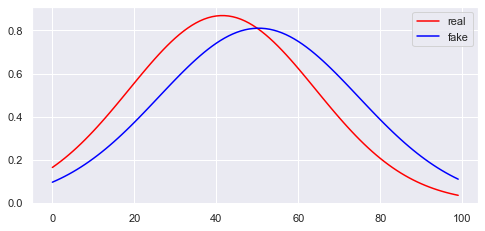

(2720,)
(5440,)
>6, d1=0.747, d2=0.714 , g=0.294, acc1=0.562, acc2=0.500
TRAIN RMSE : 0.760
TRAIN MSE : 0.577
Train MAPE = inf
Train MAE = 0.629
 Train R-Squared  = 0.317
Train Probabilites
Mean_real=-0.131, Standard Deviation_real=0.451
Mean_fake=0.016, Standard Deviation_fake=0.577
KL(P || Q): 3.183
JS(P || Q) :0.122


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


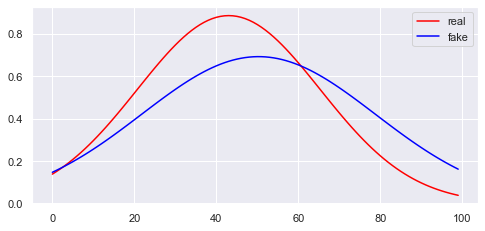

(2720,)
(5440,)
>7, d1=0.758, d2=0.713 , g=0.316, acc1=0.594, acc2=0.531
TRAIN RMSE : 0.811
TRAIN MSE : 0.658
Train MAPE = inf
Train MAE = 0.673
 Train R-Squared  = 0.052
Train Probabilites
Mean_real=-0.136, Standard Deviation_real=0.470
Mean_fake=0.014, Standard Deviation_fake=0.643
KL(P || Q): 3.356
JS(P || Q) :0.126


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


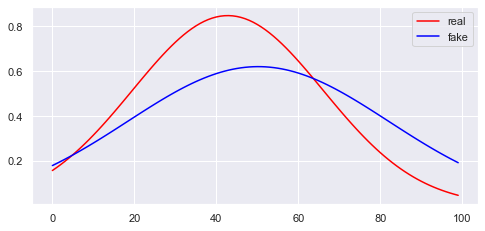

(2720,)
(5440,)
>8, d1=0.718, d2=0.707 , g=0.306, acc1=0.469, acc2=0.531
TRAIN RMSE : 0.824
TRAIN MSE : 0.679
Train MAPE = inf
Train MAE = 0.692
 Train R-Squared  = 0.203
Train Probabilites
Mean_real=-0.178, Standard Deviation_real=0.441
Mean_fake=0.013, Standard Deviation_fake=0.674
KL(P || Q): 6.353
JS(P || Q) :0.169


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


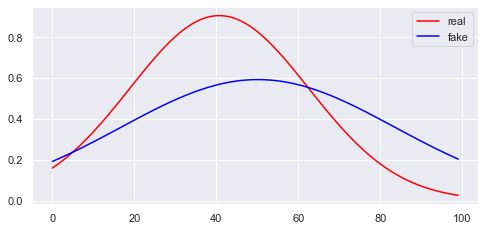

(2720,)
(5440,)
>9, d1=0.753, d2=0.701 , g=0.310, acc1=0.406, acc2=0.562
TRAIN RMSE : 0.854
TRAIN MSE : 0.729
Train MAPE = inf
Train MAE = 0.712
 Train R-Squared  = 0.387
Train Probabilites
Mean_real=-0.140, Standard Deviation_real=0.470
Mean_fake=0.013, Standard Deviation_fake=0.686
KL(P || Q): 3.937
JS(P || Q) :0.136


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


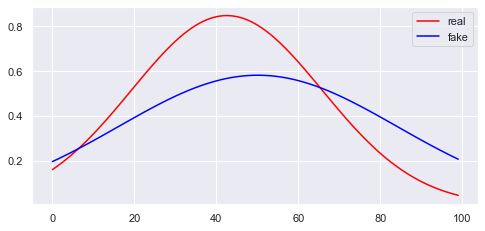

(2720,)
(5440,)
>10, d1=0.733, d2=0.698 , g=0.287, acc1=0.594, acc2=0.562
TRAIN RMSE : 0.844
TRAIN MSE : 0.712
Train MAPE = inf
Train MAE = 0.705
 Train R-Squared  = 0.012
Train Probabilites
Mean_real=-0.158, Standard Deviation_real=0.457
Mean_fake=0.012, Standard Deviation_fake=0.690
KL(P || Q): 5.019
JS(P || Q) :0.152


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


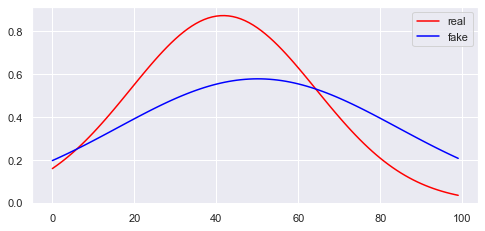

Training Loss


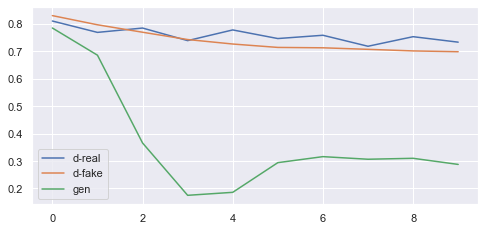

Training RMSE


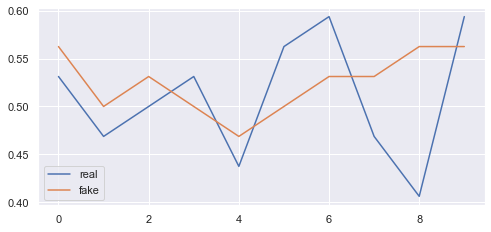

(1341725,)
Train Performance


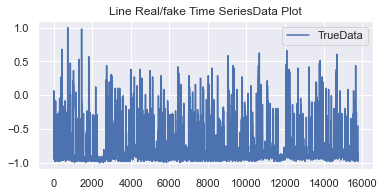

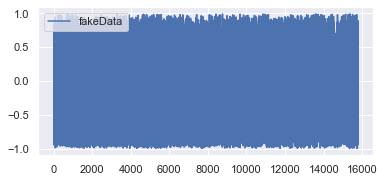

**********Testing Starts Here***************....
(335495,)
Test Loss Values
>9, d1=1.044, d2=0.284 , rmse1= 0.129, rmse2=0.931
real test (3947, 85)
dis_fake_x after reshape (3947, 85)
Test RMSE : 0.819
Test MSE : 0.670
Test MAPE = inf
Test MAE = 0.673


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/3976725331.py:40: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_O2 = np.mean(np.abs((dis_real_x - dis_fake_x) / dis_real_x))


Test R-Squared = 0.786


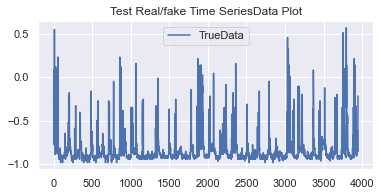

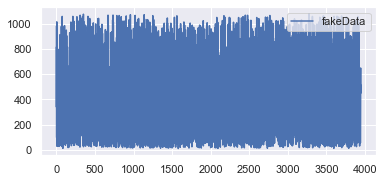

Test Probabilites
Mean_real=0.022, Standard Deviation_real=0.519
Mean_fake=0.006, Standard Deviation_fake=0.609
KL(P || Q): 0.428
JS(P || Q) :0.045


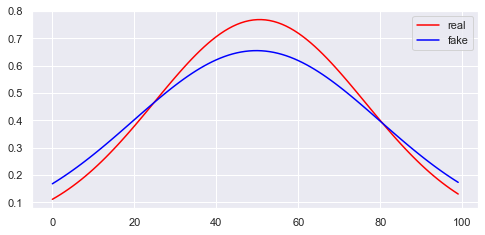

(2720,)
(5440,)
>11, d1=0.725, d2=0.697 , g=0.265, acc1=0.375, acc2=0.531
TRAIN RMSE : 0.855
TRAIN MSE : 0.731
Train MAPE = inf
Train MAE = 0.717
 Train R-Squared  = 0.346
Train Probabilites
Mean_real=-0.200, Standard Deviation_real=0.445
Mean_fake=0.012, Standard Deviation_fake=0.692
KL(P || Q): 7.071
JS(P || Q) :0.179


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


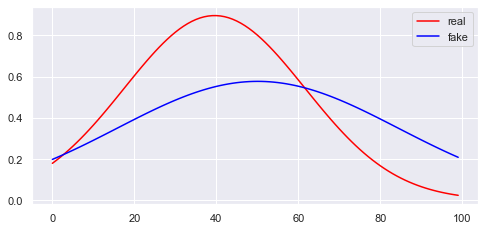

(2720,)
(5440,)
>12, d1=0.727, d2=0.696 , g=0.265, acc1=0.594, acc2=0.531
TRAIN RMSE : 0.839
TRAIN MSE : 0.705
Train MAPE = inf
Train MAE = 0.708
 Train R-Squared  = 0.005
Train Probabilites
Mean_real=-0.161, Standard Deviation_real=0.444
Mean_fake=0.012, Standard Deviation_fake=0.693
KL(P || Q): 5.866
JS(P || Q) :0.164


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


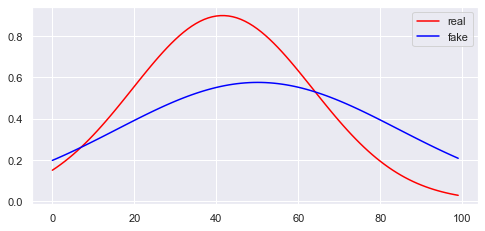

(2720,)
(5440,)
>13, d1=0.756, d2=0.696 , g=0.245, acc1=0.438, acc2=0.469
TRAIN RMSE : 0.838
TRAIN MSE : 0.703
Train MAPE = inf
Train MAE = 0.708
 Train R-Squared  = 0.196
Train Probabilites
Mean_real=-0.161, Standard Deviation_real=0.434
Mean_fake=0.012, Standard Deviation_fake=0.694
KL(P || Q): 6.523
JS(P || Q) :0.171


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


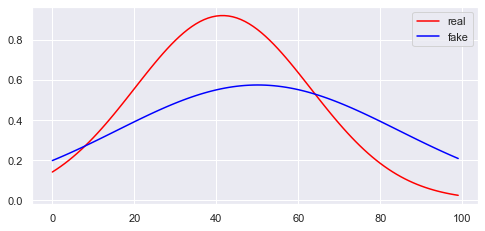

(2720,)
(5440,)
>14, d1=0.744, d2=0.696 , g=0.246, acc1=0.531, acc2=0.500
TRAIN RMSE : 0.848
TRAIN MSE : 0.720
Train MAPE = inf
Train MAE = 0.709
 Train R-Squared  = 0.442
Train Probabilites
Mean_real=-0.147, Standard Deviation_real=0.465
Mean_fake=0.012, Standard Deviation_fake=0.695
KL(P || Q): 4.413
JS(P || Q) :0.143


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


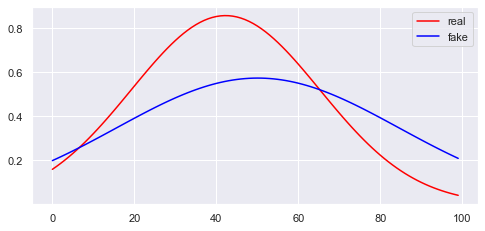

(2720,)
(5440,)
>15, d1=0.722, d2=0.696 , g=0.220, acc1=0.625, acc2=0.438
TRAIN RMSE : 0.847
TRAIN MSE : 0.717
Train MAPE = inf
Train MAE = 0.707
 Train R-Squared  = 0.034
Train Probabilites
Mean_real=-0.175, Standard Deviation_real=0.443
Mean_fake=0.012, Standard Deviation_fake=0.696
KL(P || Q): 6.427
JS(P || Q) :0.171


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


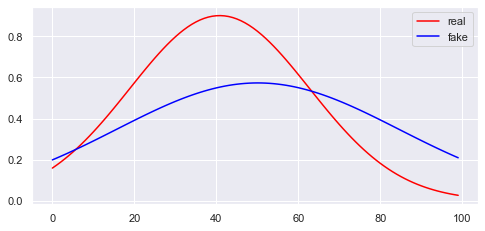

(2720,)
(5440,)
>16, d1=0.744, d2=0.696 , g=0.225, acc1=0.375, acc2=0.531
TRAIN RMSE : 0.855
TRAIN MSE : 0.731
Train MAPE = inf
Train MAE = 0.712
 Train R-Squared  = 0.327
Train Probabilites
Mean_real=-0.170, Standard Deviation_real=0.459
Mean_fake=0.012, Standard Deviation_fake=0.696
KL(P || Q): 5.351
JS(P || Q) :0.157


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


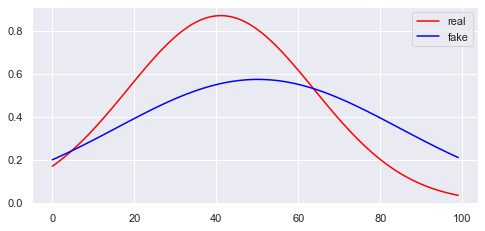

(2720,)
(5440,)
>17, d1=0.726, d2=0.696 , g=0.225, acc1=0.531, acc2=0.531
TRAIN RMSE : 0.841
TRAIN MSE : 0.707
Train MAPE = inf
Train MAE = 0.701
 Train R-Squared  = 0.597
Train Probabilites
Mean_real=-0.158, Standard Deviation_real=0.451
Mean_fake=0.013, Standard Deviation_fake=0.697
KL(P || Q): 5.445
JS(P || Q) :0.158


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


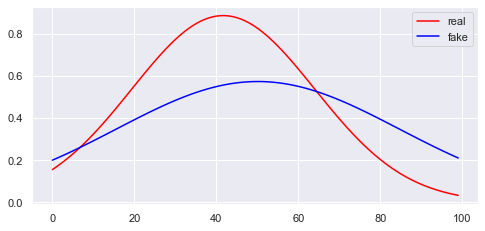

(2720,)
(5440,)
>18, d1=0.717, d2=0.696 , g=0.218, acc1=0.531, acc2=0.469
TRAIN RMSE : 0.849
TRAIN MSE : 0.721
Train MAPE = inf
Train MAE = 0.709
 Train R-Squared  = 0.502
Train Probabilites
Mean_real=-0.145, Standard Deviation_real=0.449
Mean_fake=0.013, Standard Deviation_fake=0.697
KL(P || Q): 5.202
JS(P || Q) :0.155


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


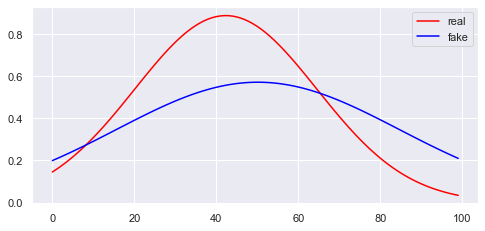

(2720,)
(5440,)
>19, d1=0.712, d2=0.696 , g=0.204, acc1=0.500, acc2=0.438
TRAIN RMSE : 0.854
TRAIN MSE : 0.730
Train MAPE = inf
Train MAE = 0.713
 Train R-Squared  = 0.634
Train Probabilites
Mean_real=-0.165, Standard Deviation_real=0.459
Mean_fake=0.013, Standard Deviation_fake=0.698
KL(P || Q): 5.242
JS(P || Q) :0.156


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


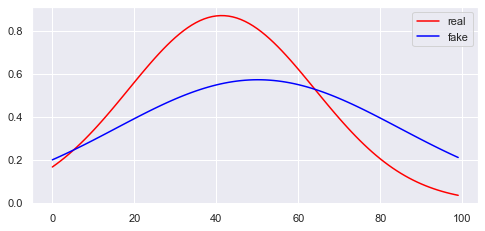

(2720,)
(5440,)
>20, d1=0.737, d2=0.695 , g=0.193, acc1=0.438, acc2=0.469
TRAIN RMSE : 0.855
TRAIN MSE : 0.731
Train MAPE = inf
Train MAE = 0.714
 Train R-Squared  = 0.408
Train Probabilites
Mean_real=-0.185, Standard Deviation_real=0.448
Mean_fake=0.013, Standard Deviation_fake=0.699
KL(P || Q): 6.504
JS(P || Q) :0.172


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


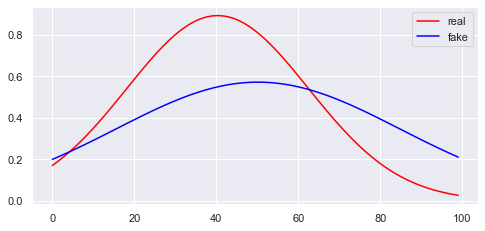

Training Loss


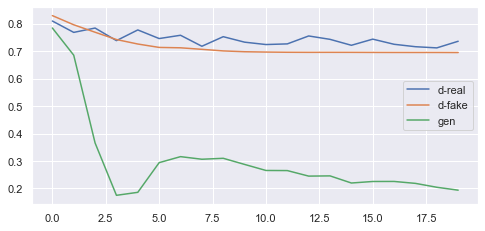

Training RMSE


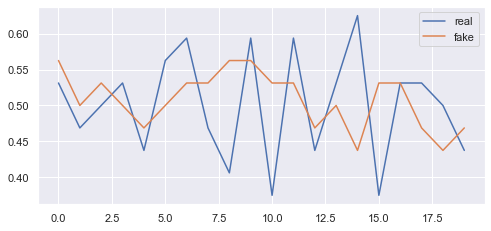

(1341725,)
Train Performance


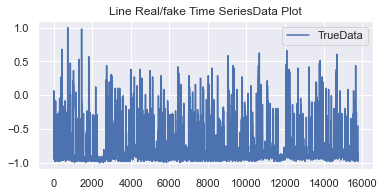

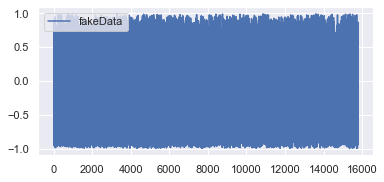

**********Testing Starts Here***************....
(335495,)
Test Loss Values
>19, d1=1.244, d2=0.208 , rmse1= 0.020, rmse2=0.969
real test (3947, 85)
dis_fake_x after reshape (3947, 85)
Test RMSE : 0.817
Test MSE : 0.668
Test MAPE = inf
Test MAE = 0.672


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/3976725331.py:40: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_O2 = np.mean(np.abs((dis_real_x - dis_fake_x) / dis_real_x))


Test R-Squared = 0.786


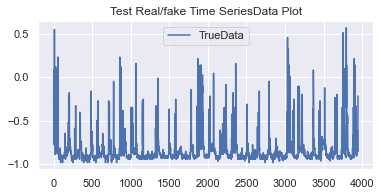

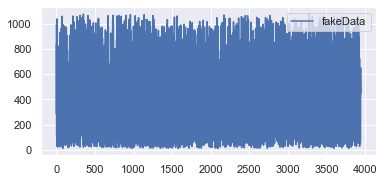

Test Probabilites
Mean_real=0.022, Standard Deviation_real=0.519
Mean_fake=0.006, Standard Deviation_fake=0.609
KL(P || Q): 0.426
JS(P || Q) :0.045


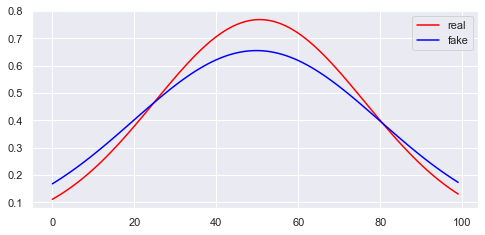

(2720,)
(5440,)
>21, d1=0.746, d2=0.695 , g=0.197, acc1=0.469, acc2=0.500
TRAIN RMSE : 0.849
TRAIN MSE : 0.721
Train MAPE = inf
Train MAE = 0.709
 Train R-Squared  = 0.538
Train Probabilites
Mean_real=-0.130, Standard Deviation_real=0.456
Mean_fake=0.014, Standard Deviation_fake=0.699
KL(P || Q): 4.501
JS(P || Q) :0.144


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


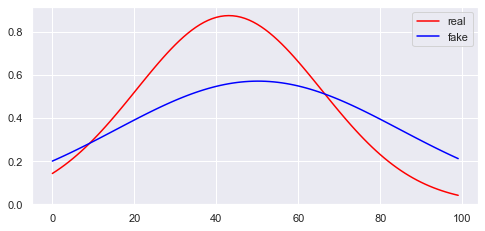

(2720,)
(5440,)
>22, d1=0.722, d2=0.696 , g=0.196, acc1=0.438, acc2=0.500
TRAIN RMSE : 0.849
TRAIN MSE : 0.720
Train MAPE = inf
Train MAE = 0.713
 Train R-Squared  = 0.271
Train Probabilites
Mean_real=-0.145, Standard Deviation_real=0.456
Mean_fake=0.014, Standard Deviation_fake=0.700
KL(P || Q): 4.895
JS(P || Q) :0.150


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


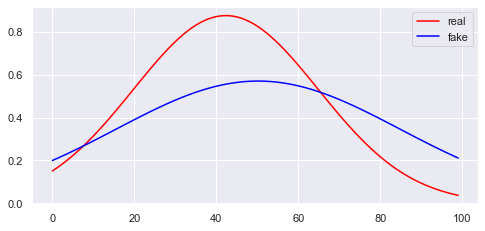

(2720,)
(5440,)
>23, d1=0.727, d2=0.696 , g=0.183, acc1=0.469, acc2=0.438
TRAIN RMSE : 0.859
TRAIN MSE : 0.737
Train MAPE = inf
Train MAE = 0.716
 Train R-Squared  = 0.451
Train Probabilites
Mean_real=-0.172, Standard Deviation_real=0.463
Mean_fake=0.014, Standard Deviation_fake=0.700
KL(P || Q): 5.291
JS(P || Q) :0.157


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


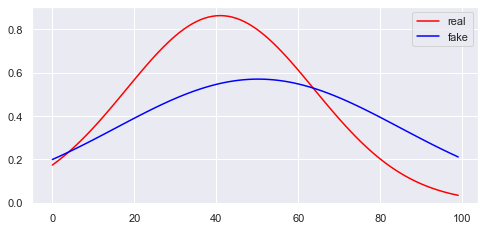

(2720,)
(5440,)
>24, d1=0.725, d2=0.695 , g=0.181, acc1=0.562, acc2=0.438
TRAIN RMSE : 0.834
TRAIN MSE : 0.696
Train MAPE = inf
Train MAE = 0.703
 Train R-Squared  = 0.284
Train Probabilites
Mean_real=-0.156, Standard Deviation_real=0.427
Mean_fake=0.014, Standard Deviation_fake=0.701
KL(P || Q): 6.924
JS(P || Q) :0.176


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


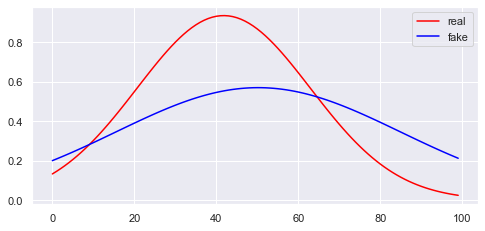

(2720,)
(5440,)
>25, d1=0.711, d2=0.695 , g=0.174, acc1=0.531, acc2=0.469
TRAIN RMSE : 0.847
TRAIN MSE : 0.718
Train MAPE = inf
Train MAE = 0.705
 Train R-Squared  = 0.532
Train Probabilites
Mean_real=-0.128, Standard Deviation_real=0.469
Mean_fake=0.015, Standard Deviation_fake=0.701
KL(P || Q): 3.917
JS(P || Q) :0.135


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


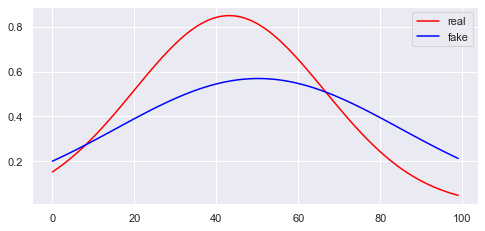

(2720,)
(5440,)
>26, d1=0.721, d2=0.695 , g=0.169, acc1=0.438, acc2=0.500
TRAIN RMSE : 0.853
TRAIN MSE : 0.728
Train MAPE = inf
Train MAE = 0.717
 Train R-Squared  = 0.555
Train Probabilites
Mean_real=-0.154, Standard Deviation_real=0.457
Mean_fake=0.015, Standard Deviation_fake=0.702
KL(P || Q): 5.126
JS(P || Q) :0.154


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


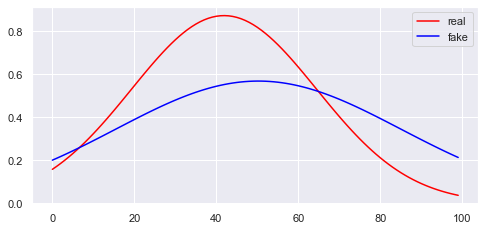

(2720,)
(5440,)
>27, d1=0.715, d2=0.695 , g=0.176, acc1=0.469, acc2=0.500
TRAIN RMSE : 0.841
TRAIN MSE : 0.708
Train MAPE = inf
Train MAE = 0.708
 Train R-Squared  = 0.087
Train Probabilites
Mean_real=-0.146, Standard Deviation_real=0.446
Mean_fake=0.016, Standard Deviation_fake=0.702
KL(P || Q): 5.459
JS(P || Q) :0.158


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


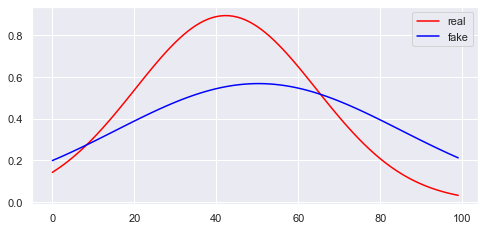

(2720,)
(5440,)
>28, d1=0.710, d2=0.695 , g=0.169, acc1=0.562, acc2=0.469
TRAIN RMSE : 0.860
TRAIN MSE : 0.740
Train MAPE = inf
Train MAE = 0.719
 Train R-Squared  = 0.261
Train Probabilites
Mean_real=-0.180, Standard Deviation_real=0.452
Mean_fake=0.016, Standard Deviation_fake=0.703
KL(P || Q): 6.181
JS(P || Q) :0.168


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


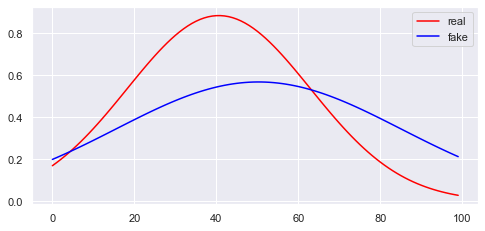

(2720,)
(5440,)
>29, d1=0.713, d2=0.695 , g=0.157, acc1=0.406, acc2=0.469
TRAIN RMSE : 0.851
TRAIN MSE : 0.724
Train MAPE = inf
Train MAE = 0.707
 Train R-Squared  = 0.406
Train Probabilites
Mean_real=-0.141, Standard Deviation_real=0.455
Mean_fake=0.016, Standard Deviation_fake=0.703
KL(P || Q): 4.909
JS(P || Q) :0.151


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


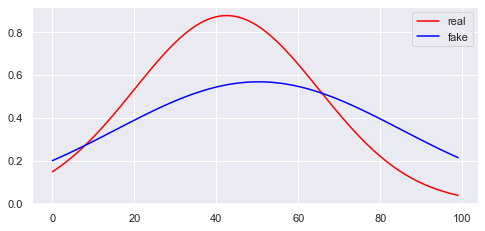

(2720,)
(5440,)
>30, d1=0.720, d2=0.695 , g=0.156, acc1=0.500, acc2=0.469
TRAIN RMSE : 0.844
TRAIN MSE : 0.712
Train MAPE = inf
Train MAE = 0.709
 Train R-Squared  = 0.530
Train Probabilites
Mean_real=-0.140, Standard Deviation_real=0.447
Mean_fake=0.017, Standard Deviation_fake=0.704
KL(P || Q): 5.286
JS(P || Q) :0.156


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


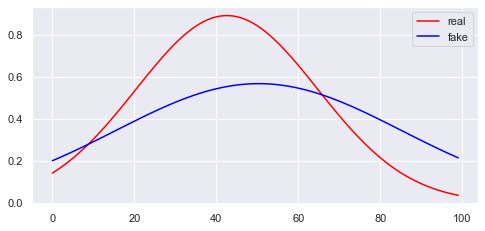

Training Loss


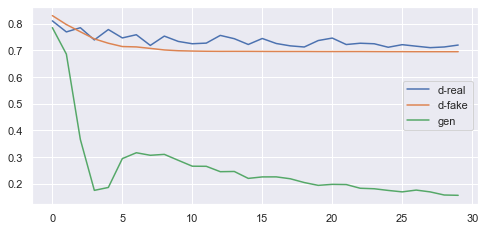

Training RMSE


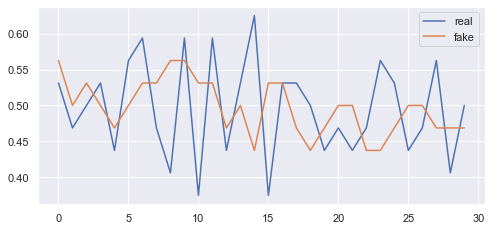

(1341725,)
Train Performance


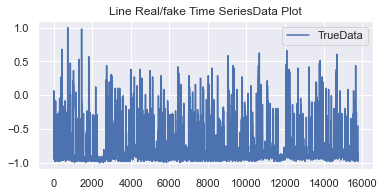

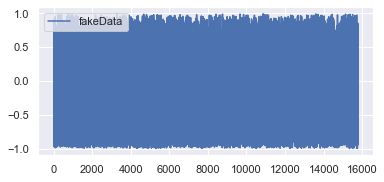

**********Testing Starts Here***************....
(335495,)
Test Loss Values
>29, d1=1.396, d2=0.160 , rmse1= 0.001, rmse2=0.987
real test (3947, 85)
dis_fake_x after reshape (3947, 85)
Test RMSE : 0.818
Test MSE : 0.669
Test MAPE = inf
Test MAE = 0.672


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/3976725331.py:40: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_O2 = np.mean(np.abs((dis_real_x - dis_fake_x) / dis_real_x))


Test R-Squared = 0.786


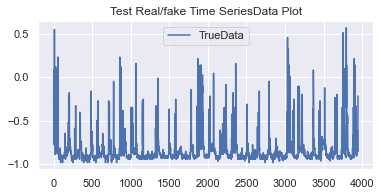

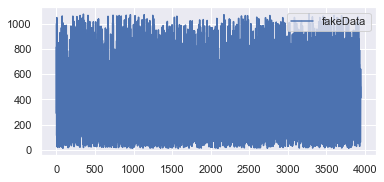

Test Probabilites
Mean_real=0.022, Standard Deviation_real=0.519
Mean_fake=0.005, Standard Deviation_fake=0.610
KL(P || Q): 0.435
JS(P || Q) :0.045


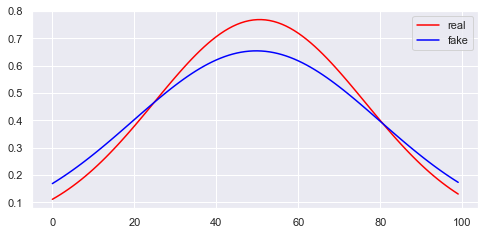

(2720,)
(5440,)
>31, d1=0.725, d2=0.695 , g=0.153, acc1=0.594, acc2=0.531
TRAIN RMSE : 0.865
TRAIN MSE : 0.748
Train MAPE = inf
Train MAE = 0.720
 Train R-Squared  = 0.330
Train Probabilites
Mean_real=-0.144, Standard Deviation_real=0.473
Mean_fake=0.017, Standard Deviation_fake=0.704
KL(P || Q): 4.194
JS(P || Q) :0.140


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


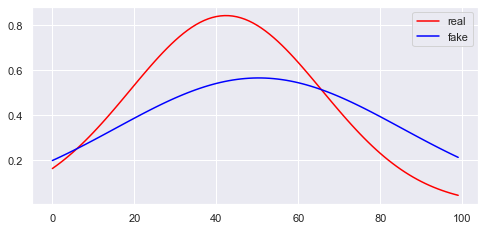

(2720,)
(5440,)
>32, d1=0.707, d2=0.695 , g=0.153, acc1=0.500, acc2=0.469
TRAIN RMSE : 0.849
TRAIN MSE : 0.721
Train MAPE = inf
Train MAE = 0.710
 Train R-Squared  = 0.460
Train Probabilites
Mean_real=-0.137, Standard Deviation_real=0.466
Mean_fake=0.017, Standard Deviation_fake=0.704
KL(P || Q): 4.332
JS(P || Q) :0.142


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


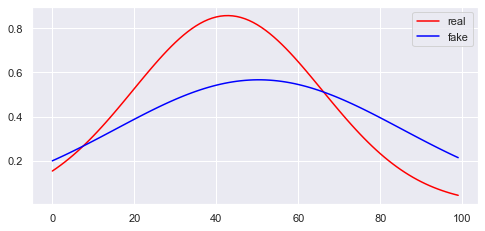

(2720,)
(5440,)
>33, d1=0.720, d2=0.695 , g=0.146, acc1=0.469, acc2=0.438
TRAIN RMSE : 0.859
TRAIN MSE : 0.738
Train MAPE = 1350859390597.374
Train MAE = 0.716
 Train R-Squared  = 0.412
Train Probabilites
Mean_real=-0.186, Standard Deviation_real=0.457
Mean_fake=0.017, Standard Deviation_fake=0.705
KL(P || Q): 6.147
JS(P || Q) :0.168


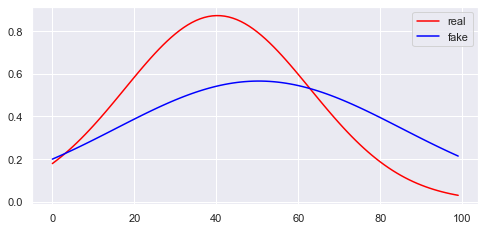

(2720,)
(5440,)
>34, d1=0.708, d2=0.695 , g=0.145, acc1=0.594, acc2=0.500
TRAIN RMSE : 0.856
TRAIN MSE : 0.733
Train MAPE = inf
Train MAE = 0.720
 Train R-Squared  = 0.313
Train Probabilites
Mean_real=-0.161, Standard Deviation_real=0.446
Mean_fake=0.017, Standard Deviation_fake=0.705
KL(P || Q): 5.982
JS(P || Q) :0.165


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


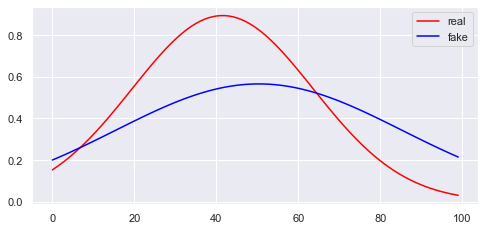

(2720,)
(5440,)
>35, d1=0.708, d2=0.695 , g=0.151, acc1=0.438, acc2=0.438
TRAIN RMSE : 0.848
TRAIN MSE : 0.720
Train MAPE = inf
Train MAE = 0.708
 Train R-Squared  = 0.204
Train Probabilites
Mean_real=-0.141, Standard Deviation_real=0.450
Mean_fake=0.018, Standard Deviation_fake=0.706
KL(P || Q): 5.227
JS(P || Q) :0.155


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


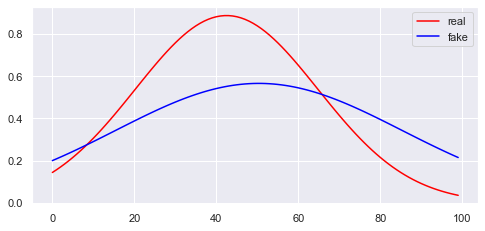

(2720,)
(5440,)
>36, d1=0.712, d2=0.695 , g=0.144, acc1=0.469, acc2=0.469
TRAIN RMSE : 0.838
TRAIN MSE : 0.703
Train MAPE = 1651960184838.182
Train MAE = 0.700
 Train R-Squared  = 0.234
Train Probabilites
Mean_real=-0.168, Standard Deviation_real=0.455
Mean_fake=0.018, Standard Deviation_fake=0.706
KL(P || Q): 5.669
JS(P || Q) :0.162


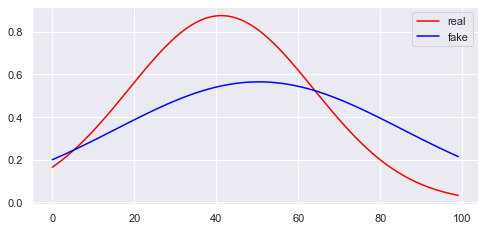

(2720,)
(5440,)
>37, d1=0.712, d2=0.695 , g=0.145, acc1=0.500, acc2=0.531
TRAIN RMSE : 0.842
TRAIN MSE : 0.709
Train MAPE = inf
Train MAE = 0.709
 Train R-Squared  = 0.434
Train Probabilites
Mean_real=-0.145, Standard Deviation_real=0.428
Mean_fake=0.018, Standard Deviation_fake=0.706
KL(P || Q): 6.679
JS(P || Q) :0.173


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


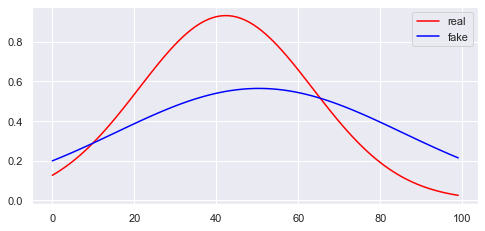

(2720,)
(5440,)
>38, d1=0.711, d2=0.695 , g=0.137, acc1=0.375, acc2=0.469
TRAIN RMSE : 0.849
TRAIN MSE : 0.722
Train MAPE = inf
Train MAE = 0.710
 Train R-Squared  = 0.147
Train Probabilites
Mean_real=-0.159, Standard Deviation_real=0.453
Mean_fake=0.018, Standard Deviation_fake=0.707
KL(P || Q): 5.538
JS(P || Q) :0.160


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


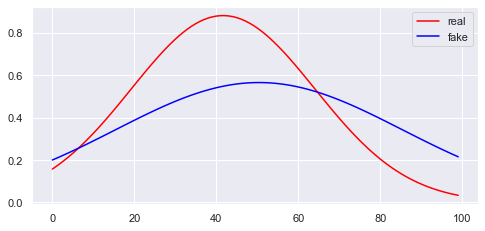

(2720,)
(5440,)
>39, d1=0.704, d2=0.695 , g=0.131, acc1=0.500, acc2=0.438
TRAIN RMSE : 0.856
TRAIN MSE : 0.733
Train MAPE = inf
Train MAE = 0.722
 Train R-Squared  = 0.182
Train Probabilites
Mean_real=-0.168, Standard Deviation_real=0.441
Mean_fake=0.018, Standard Deviation_fake=0.707
KL(P || Q): 6.521
JS(P || Q) :0.172


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


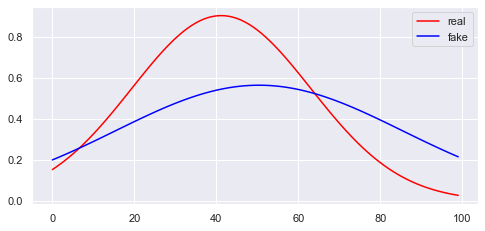

(2720,)
(5440,)
>40, d1=0.720, d2=0.695 , g=0.126, acc1=0.438, acc2=0.406
TRAIN RMSE : 0.858
TRAIN MSE : 0.737
Train MAPE = inf
Train MAE = 0.715
 Train R-Squared  = 0.862
Train Probabilites
Mean_real=-0.178, Standard Deviation_real=0.461
Mean_fake=0.019, Standard Deviation_fake=0.707
KL(P || Q): 5.729
JS(P || Q) :0.163


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


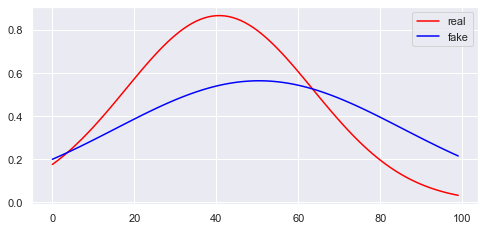

Training Loss


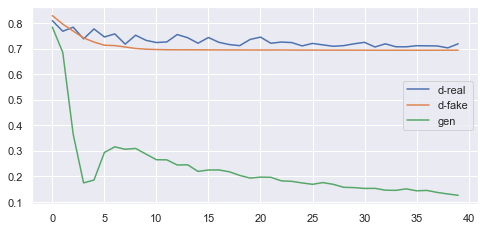

Training RMSE


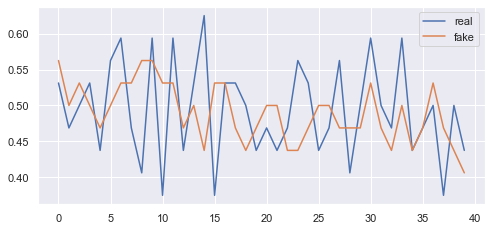

(1341725,)
Train Performance


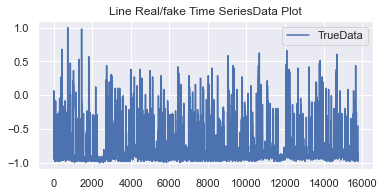

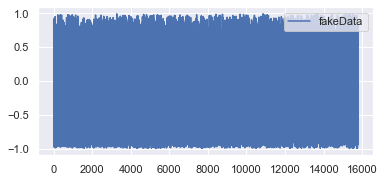

**********Testing Starts Here***************....
(335495,)
Test Loss Values
>39, d1=1.589, d2=0.138 , rmse1= 0.000, rmse2=0.993
real test (3947, 85)
dis_fake_x after reshape (3947, 85)
Test RMSE : 0.818
Test MSE : 0.670
Test MAPE = inf
Test MAE = 0.673


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/3976725331.py:40: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_O2 = np.mean(np.abs((dis_real_x - dis_fake_x) / dis_real_x))


Test R-Squared = 0.786


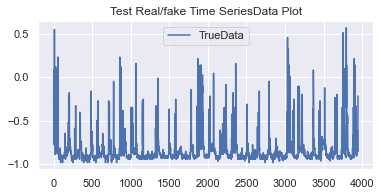

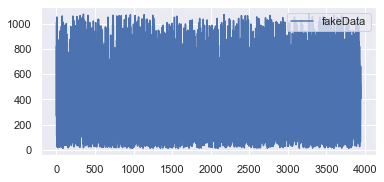

Test Probabilites
Mean_real=0.022, Standard Deviation_real=0.519
Mean_fake=0.004, Standard Deviation_fake=0.612
KL(P || Q): 0.449
JS(P || Q) :0.046


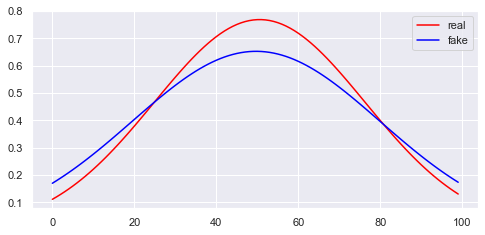

(2720,)
(5440,)
>41, d1=0.711, d2=0.695 , g=0.131, acc1=0.438, acc2=0.469
TRAIN RMSE : 0.870
TRAIN MSE : 0.756
Train MAPE = inf
Train MAE = 0.729
 Train R-Squared  = 0.276
Train Probabilites
Mean_real=-0.130, Standard Deviation_real=0.482
Mean_fake=0.019, Standard Deviation_fake=0.708
KL(P || Q): 3.572
JS(P || Q) :0.130


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


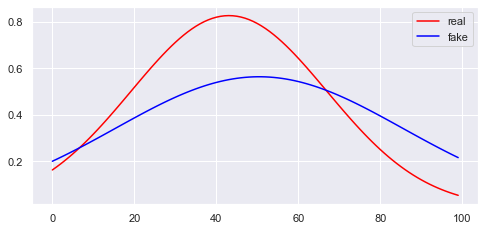

(2720,)
(5440,)
>42, d1=0.721, d2=0.695 , g=0.141, acc1=0.500, acc2=0.500
TRAIN RMSE : 0.837
TRAIN MSE : 0.701
Train MAPE = inf
Train MAE = 0.701
 Train R-Squared  = 0.308
Train Probabilites
Mean_real=-0.120, Standard Deviation_real=0.439
Mean_fake=0.019, Standard Deviation_fake=0.708
KL(P || Q): 5.341
JS(P || Q) :0.156


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


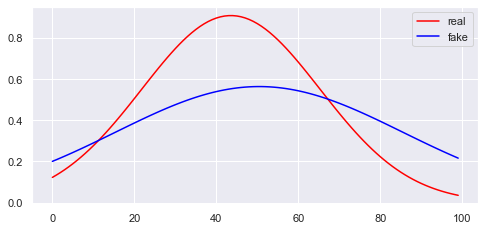

(2720,)
(5440,)
>43, d1=0.708, d2=0.695 , g=0.132, acc1=0.500, acc2=0.500
TRAIN RMSE : 0.841
TRAIN MSE : 0.708
Train MAPE = inf
Train MAE = 0.702
 Train R-Squared  = 0.000
Train Probabilites
Mean_real=-0.145, Standard Deviation_real=0.445
Mean_fake=0.019, Standard Deviation_fake=0.708
KL(P || Q): 5.677
JS(P || Q) :0.161


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


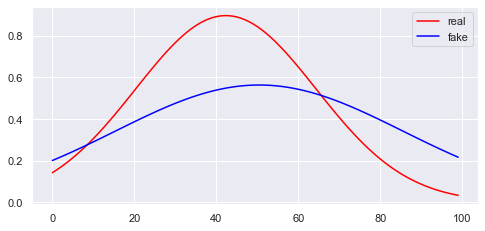

(2720,)
(5440,)
>44, d1=0.700, d2=0.695 , g=0.127, acc1=0.594, acc2=0.469
TRAIN RMSE : 0.856
TRAIN MSE : 0.732
Train MAPE = inf
Train MAE = 0.717
 Train R-Squared  = 0.621
Train Probabilites
Mean_real=-0.136, Standard Deviation_real=0.445
Mean_fake=0.019, Standard Deviation_fake=0.709
KL(P || Q): 5.414
JS(P || Q) :0.158


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


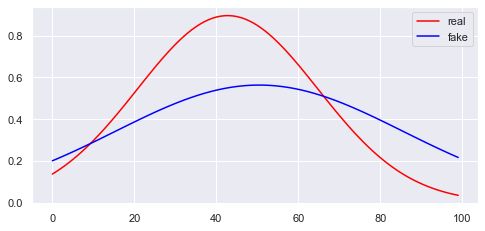

(2720,)
(5440,)
>45, d1=0.717, d2=0.695 , g=0.123, acc1=0.469, acc2=0.500
TRAIN RMSE : 0.853
TRAIN MSE : 0.727
Train MAPE = inf
Train MAE = 0.714
 Train R-Squared  = 0.324
Train Probabilites
Mean_real=-0.145, Standard Deviation_real=0.462
Mean_fake=0.019, Standard Deviation_fake=0.709
KL(P || Q): 4.761
JS(P || Q) :0.149


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


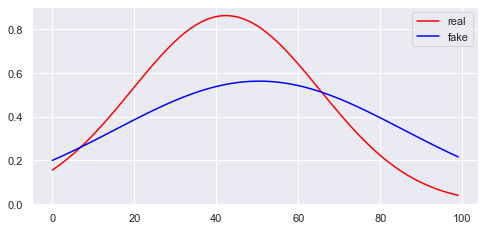

(2720,)
(5440,)
>46, d1=0.716, d2=0.695 , g=0.137, acc1=0.438, acc2=0.531
TRAIN RMSE : 0.860
TRAIN MSE : 0.739
Train MAPE = inf
Train MAE = 0.716
 Train R-Squared  = 0.009
Train Probabilites
Mean_real=-0.163, Standard Deviation_real=0.460
Mean_fake=0.020, Standard Deviation_fake=0.709
KL(P || Q): 5.373
JS(P || Q) :0.158


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


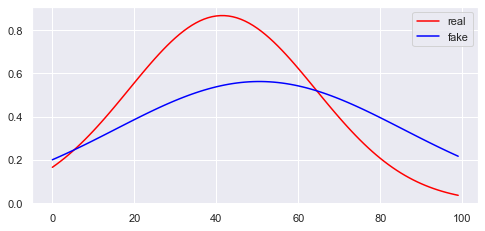

(2720,)
(5440,)
>47, d1=0.710, d2=0.695 , g=0.126, acc1=0.344, acc2=0.562
TRAIN RMSE : 0.859
TRAIN MSE : 0.738
Train MAPE = inf
Train MAE = 0.721
 Train R-Squared  = 0.115
Train Probabilites
Mean_real=-0.197, Standard Deviation_real=0.436
Mean_fake=0.020, Standard Deviation_fake=0.710
KL(P || Q): 8.034
JS(P || Q) :0.189


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


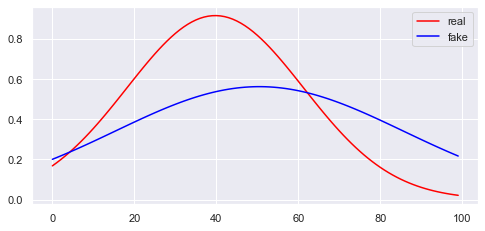

(2720,)
(5440,)
>48, d1=0.709, d2=0.694 , g=0.130, acc1=0.531, acc2=0.438
TRAIN RMSE : 0.851
TRAIN MSE : 0.724
Train MAPE = inf
Train MAE = 0.715
 Train R-Squared  = 0.194
Train Probabilites
Mean_real=-0.154, Standard Deviation_real=0.445
Mean_fake=0.020, Standard Deviation_fake=0.710
KL(P || Q): 5.916
JS(P || Q) :0.164


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


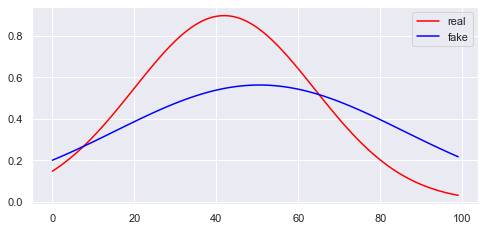

(2720,)
(5440,)
>49, d1=0.704, d2=0.694 , g=0.127, acc1=0.531, acc2=0.438
TRAIN RMSE : 0.855
TRAIN MSE : 0.732
Train MAPE = inf
Train MAE = 0.714
 Train R-Squared  = 0.350
Train Probabilites
Mean_real=-0.189, Standard Deviation_real=0.441
Mean_fake=0.020, Standard Deviation_fake=0.710
KL(P || Q): 7.397
JS(P || Q) :0.182


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


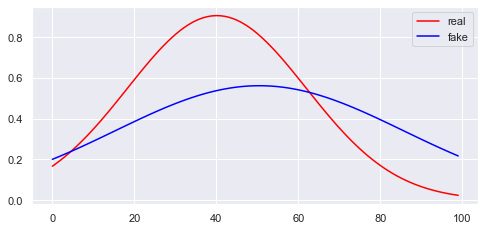

(2720,)
(5440,)
>50, d1=0.712, d2=0.694 , g=0.122, acc1=0.531, acc2=0.469
TRAIN RMSE : 0.844
TRAIN MSE : 0.712
Train MAPE = inf
Train MAE = 0.713
 Train R-Squared  = 0.405
Train Probabilites
Mean_real=-0.139, Standard Deviation_real=0.428
Mean_fake=0.020, Standard Deviation_fake=0.711
KL(P || Q): 6.570
JS(P || Q) :0.172


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/1847394553.py:72: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_01 = np.mean(np.abs((gen_x_real - x_fake) / gen_x_real))


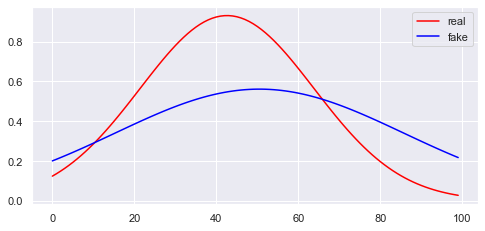

Training Loss


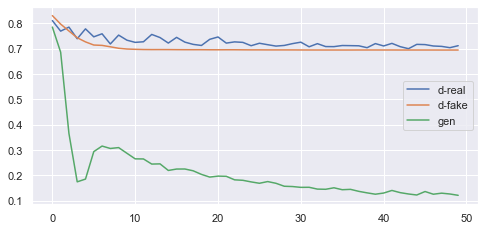

Training RMSE


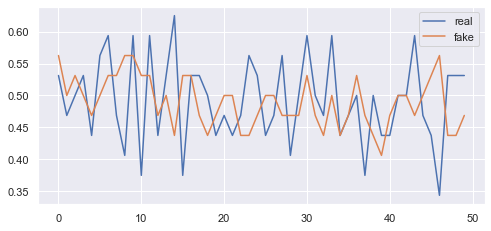

(1341725,)
Train Performance


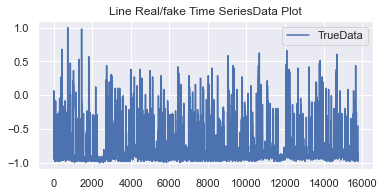

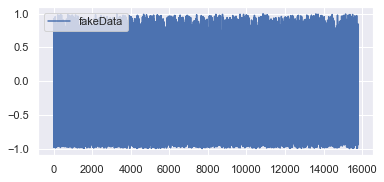

**********Testing Starts Here***************....
(335495,)
Test Loss Values
>49, d1=1.625, d2=0.114 , rmse1= 0.000, rmse2=0.998
real test (3947, 85)
dis_fake_x after reshape (3947, 85)
Test RMSE : 0.820
Test MSE : 0.672
Test MAPE = inf
Test MAE = 0.674


C:\Users\hzahid\AppData\Local\Temp/ipykernel_2968/3976725331.py:40: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_O2 = np.mean(np.abs((dis_real_x - dis_fake_x) / dis_real_x))


Test R-Squared = 0.786


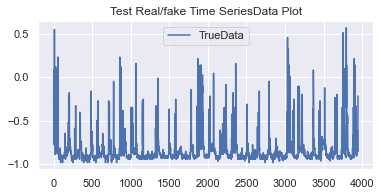

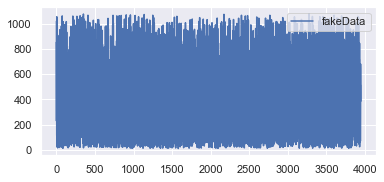

Test Probabilites
Mean_real=0.022, Standard Deviation_real=0.519
Mean_fake=0.003, Standard Deviation_fake=0.613
KL(P || Q): 0.465
JS(P || Q) :0.047


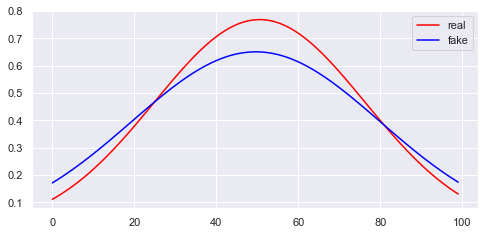

In [33]:
# train model
training(generator, discriminator, gan_model)

In [34]:
new_latent_dim=85
new_n_batch=19732
# new_latent_dim=77
# new_n_batch=2180
print(test_X.shape)
print(new_latent_dim)
print(new_n_batch)
z_input = generate_latent_points(new_latent_dim,new_n_batch) 

print("Z_INPUT",z_input.shape)
#z_input = z_input.reshape(19732, 1 ,112)
z_input = z_input.reshape(z_input.shape[0],1,test_X.shape[1])
dis_fake_X = generator.predict(z_input)
#print("x_fake_Z_input", X.shape)
#2180, 77
# create class labels
dis_fake_y = ones((new_n_batch, 1))
dis_fake_X=dis_fake_X.reshape(len(dis_fake_X),new_latent_dim)
print(dis_fake_X.shape)
print(type(dis_fake_X))

(3947, 85)
85
19732
(1677220,)
Z_INPUT (19732, 85)
(19732, 85)
<class 'numpy.ndarray'>


In [ ]:
dis_fake_X,y_fake=generate_fake_samples(generator, 85, 19732)
print("x_fake")
print(x_fake)
x_fake=x_fake.reshape(-1, x_fake.shape[-1])
x_fakeScaled = pd.DataFrame(x_fake)
x_fakeScaled.to_csv('df_syntheticdata.csv',index=False)

In [35]:
headerList = ['var1(t-3)','var2(t-3)','var3(t-3)','var4(t-3)','var5(t-3)','var6(t-3)',
'var7(t-3)','var8(t-3)','var9(t-3)','var10(t-3)','var11(t-3)','var12(t-3)','var13(t-3)','var14(t-3)','var15(t-3)','var16(t-3)',
'var17(t-3)','var18(t-3)','var19(t-3)','var20(t-3)','var21(t-3)','var22(t-3)','var23(t-3)','var24(t-3)','var25(t-3)',
'var26(t-3)','var27(t-3)','var28(t-3)','var1(t-2)','var2(t-2)','var3(t-2)','var4(t-2)','var5(t-2)','var6(t-2)','var7(t-2)','var8(t-2)','var9(t-2)','var10(t-2)',
'var11(t-2)','var12(t-2)','var13(t-2)','var14(t-2)','var15(t-2)','var16(t-2)','var17(t-2)','var18(t-2)','var19(t-2)','var20(t-2)','var21(t-2)','var22(t-2)','var23(t-2)','var24(t-2)','var25(t-2)'
'var26(t-2)','var27(t-2)','var28(t-2)''var1(t-1)','var2(t-1)','var3(t-1)','var4(t-1)','var5(t-1)','var6(t-1)','var7(t-1)','var8(t-1)', 
'var9(t-1)','var10(t-1)','var11(t-1)','var12(t-1)','var13(t-1)','var14(t-1)','var15(t-1)','var16(t-1)'
'var17(t-1)','var18(t-1)','var19(t-1)','var20(t-1)','var21(t-1)','var22(t-1)','var23(t-1)','var24(t-1)','var25(t-1)'
'var26(t-1)','var27(t-1)','var28(t-1)','var1(t)']

In [36]:
df_fake = pd.DataFrame(dis_fake_X)

In [37]:
df_fake.columns = ['var1(t-3)','var2(t-3)','var3(t-3)','var4(t-3)','var5(t-3)','var6(t-3)',
'var7(t-3)','var8(t-3)','var9(t-3)','var10(t-3)','var11(t-3)','var12(t-3)','var13(t-3)','var14(t-3)','var15(t-3)','var16(t-3)',
'var17(t-3)','var18(t-3)','var19(t-3)','var20(t-3)','var21(t-3)','var22(t-3)','var23(t-3)','var24(t-3)','var25(t-3)',
'var26(t-3)','var27(t-3)','var28(t-3)','var1(t-2)','var2(t-2)','var3(t-2)','var4(t-2)','var5(t-2)','var6(t-2)','var7(t-2)','var8(t-2)','var9(t-2)','var10(t-2)',
'var11(t-2)','var12(t-2)','var13(t-2)','var14(t-2)','var15(t-2)','var16(t-2)','var17(t-2)','var18(t-2)','var19(t-2)','var20(t-2)','var21(t-2)','var22(t-2)','var23(t-2)','var24(t-2)',
'var25(t-2)','var26(t-2)','var27(t-2)','var28(t-2)','var1(t-1)','var2(t-1)','var3(t-1)','var4(t-1)','var5(t-1)','var6(t-1)','var7(t-1)','var8(t-1)', 
'var9(t-1)','var10(t-1)','var11(t-1)','var12(t-1)','var13(t-1)','var14(t-1)','var15(t-1)','var16(t-1)','var17(t-1)','var18(t-1)','var19(t-1)','var20(t-1)','var21(t-1)','var22(t-1)','var23(t-1)','var24(t-1)','var25(t-1)',
'var26(t-1)','var27(t-1)','var28(t-1)','var1(t)']

In [38]:
print(df_fake)
df_fake.to_excel('saved_file.xlsx')

       var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
0       0.394961   0.907033  -0.530515   0.390945   0.010532   0.069078   
1       0.710929   0.063694  -0.364749   0.941092   0.268506   0.839253   
2       0.457529  -0.746976  -0.766374   0.863041  -0.450557   0.607680   
3      -0.357548   0.443675  -0.840736   0.289372  -0.159211  -0.679211   
4       0.103484   0.827919  -0.952193  -0.418228   0.529617  -0.652977   
...          ...        ...        ...        ...        ...        ...   
19727   0.666735   0.859922   0.641536   0.701301   0.360429   0.512519   
19728   0.792100  -0.574670   0.633057   0.715773  -0.137542   0.513777   
19729   0.879731  -0.161051  -0.347815   0.529330   0.217167   0.281008   
19730   0.792059   0.005005   0.318952  -0.887772   0.782585  -0.541646   
19731   0.469489   0.700019  -0.762640   0.755404  -0.929525   0.089805   

       var7(t-3)  var8(t-3)  var9(t-3)  var10(t-3)  ...  var20(t-1)  \
0      -0.590777  -0.772150 

In [39]:
# create input and output
X = df_fake.drop('var1(t)', axis = 1)
y = df_fake['var1(t)']

In [40]:
from sklearn.model_selection import train_test_split

X_train_size = int(len(X) * 0.75)
X_test_size = len(X) - X_train_size
print(X_train_size)
print(X_test_size)
X_train, X_test = X[0:X_train_size], X[X_train_size:len(X)] 

y_train_size = int(len(y) * 0.75)
y_test_size = len(y) - y_train_size
y_train,y_test = y[0:y_train_size],y[y_train_size:len(y)] 

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

14799
4933
X_train: (14799, 84)
y_train: (14799,)
X_test: (4933, 84)
y_test: (4933,)


In [41]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# make a function that include all regression models
def allRegressors(X_train, X_test, y_train, y_test):
    """
    This function use multiple machine learning regressors and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) for each regressors and
    comparison plot for regressors according to RMSE and MAE
    """
    Regressors = [LinearRegression(), RandomForestRegressor(), GradientBoostingRegressor(), 
                   DecisionTreeRegressor()]
    mae_dict = {}
    mae_scores = []
    rmse_dict = {}
    rmse_scores = []
    r2_dict = {}
    r2_scores = []
    
    # function for mean absolute error
    def maeScore(regressor):
        """
        :param regressor: regressor model function
        :return: mean absolute error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        mae_score = mean_absolute_error(y_test, pred)
        return mae_score
    
    # function for root mean square error
    def rmseScore(regressor):
        """
        :param regressor: regressor model function
        :return: root mean score error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse_score = np.sqrt(mean_squared_error(y_test, pred))
        return rmse_score
    
    def r2Score(regressor):
        """
        :param regressor: regressor model function
        :return: mean absolute error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        r2_Score = r2_score(y_test, pred)
        return r2_Score
    
    # mean absolute error, root mean square error for each regressors
    for regressor in Regressors:
        name = regressor.__class__.__name__
        mae_dict[name] = maeScore(regressor)
        mae_scores.append(maeScore(regressor))
        rmse_dict[name] = rmseScore(regressor)
        rmse_scores.append(rmseScore(regressor))
        r2_dict[name] = r2Score(regressor)
        r2_scores.append(r2Score(regressor))
        print("*************************************************************************")
        print(f"{name} Mean Absolute Error = {mae_dict[name]}")
        print(f"{name} Root Mean Square Error = {rmse_dict[name]}")
        print(f"{name} R2_Error = {r2_dict[name]}")
        
    #Plotting the performance of regressors
    def plotPerformance(scores_list, scores_dict, metric:str):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include regressors and evaluation scores
        :param metric: metric name y axis 
        :return: plot of performance comparison of regressors
        """
        
        N = len(Regressors)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Regressors")
        plt.title("Performance Comparison of Regressors")
        plt.ylabel(f"{metric} Error")
        plt.xticks(x, scores_dict.keys(), rotation=90)
        plt.yticks(np.arange(0, np.max(scores_list), np.max(scores_list)/len(scores_list)))
        plt.show()
    
 

In [42]:
allRegressors(X_train, X_test, y_train, y_test)

*************************************************************************
LinearRegression Mean Absolute Error = 0.2392207384109497
LinearRegression Root Mean Square Error = 0.29849448800086975
LinearRegression R2_Error = 0.6924946469324983
*************************************************************************
RandomForestRegressor Mean Absolute Error = 0.30607238551927496
RandomForestRegressor Root Mean Square Error = 0.374711746696219
RandomForestRegressor R2_Error = 0.518050433234928
*************************************************************************
GradientBoostingRegressor Mean Absolute Error = 0.27290216526738803
GradientBoostingRegressor Root Mean Square Error = 0.34076145840276667
GradientBoostingRegressor R2_Error = 0.5992431066577304
*************************************************************************
DecisionTreeRegressor Mean Absolute Error = 0.42341153211743093
DecisionTreeRegressor Root Mean Square Error = 0.5561572798287467
DecisionTreeRegressor R2_Error =

In [ ]:
x_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
x_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])
print(f"shape of X_train:", x_train_lstm.shape)
print(f"shape of X_test:", x_test_lstm.shape)

In [ ]:
from tensorflow.keras import Model, Sequential, Input, backend
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

n_features = x_train_lstm.shape[2]
n_classes = 1
def regressorModel(n_features, n_classes):
    model = Sequential()
    model.add(Input(shape=(None, n_features)))
    model.add(LSTM(units=128))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    model.summary()
    return model

In [ ]:
# from keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=20, mode='min', restore_best_weights=True)
#backend.clear_session()
model = regressorModel(n_features, n_classes)
history = model.fit(x_train_lstm, y_train,#validation_split=0.2 
                    validation_data=(x_test_lstm, y_test),epochs=100, batch_size=64, shuffle = False)

In [ ]:
train_mse = model.evaluate(x_train_lstm, y_train, verbose=0)
test_mse = model.evaluate(x_test_lstm, y_test, verbose=0)
print(f'Train loss: {train_mse [0]} / Train MSE: {train_mse [1]}')
print(f'Test loss: {test_mse [0]} / Test MSE: {test_mse [1]}')      

In [ ]:
train_mse = model.evaluate(x_train_lstm, y_train, verbose=0)
test_mse = model.evaluate(x_test_lstm, y_test, verbose=0)
print(f'Train loss: {train_mse [0]} / Train MSE: {train_mse [1]}')
print(f'Test loss: {test_mse [0]} / Test MSE: {test_mse [1]}')      

In [ ]:
y_train_pred = model.predict(x_train_lstm)
print(y_train_pred)
y_test_pred = model.predict(x_test_lstm)
print(y_test_pred)
print(y_test_pred.shape)


In [ ]:
# Plot true future vs prediction
def plot_future1(y_test_pred, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(y_test_pred)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='True Future')     
    # plt.plot(np.arange(range_future),np.array(y_test_pred),
    #         label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Air-Quality (PM2.5)')


In [ ]:
# Plot true future vs prediction
def plot_future2(y_test_pred, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(y_test_pred)
    # plt.plot(np.arange(range_future), np.array(y_test), 
    #          label='True Future')     
    plt.plot(np.arange(range_future),np.array(y_test_pred),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Air-Quality (PM2.5)')

In [ ]:
plot_future1(y_test_pred, y_test)
plot_future2(y_test_pred, y_test)

In [52]:
# Define a function to calculate MAE and RMSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def evaluate_prediction(predictions, actual, model_name):
    # errors = predictions - actual
    # mse = np.square(errors).mean()
    # rmse = np.sqrt(mse)
    # mae = np.abs(errors).mean()
    mae = mean_absolute_error(actual,predictions)
    mse = mean_squared_error(actual,predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual,predictions)
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('R_2 Score: {:.4f}'.format(r2))
    print('')

evaluate_prediction(y_test_pred, y_test, 'LSTM')

LSTM:
Mean Absolute Error: 0.2049
Root Mean Square Error: 0.2662
R_2 Score: 0.7554



In [58]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne_original = TSNE(n_components=2, verbose=1, perplexity=50, random_state=42, n_iter=600)



tsne_results = tsne_original.fit_transform(df_fake)
df_fake['tsne-2d-one'] = tsne_results[:,0]
df_fake['tsne-2d-two'] = tsne_results[:,1]

# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     hue="y",
#     palette=sns.color_palette("hls", 10),
#     data=df_fake,
#     legend="full",
#     alpha=0.3
# )

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19732 samples in 0.002s...
[t-SNE] Computed neighbors for 19732 samples in 8.751s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19732
[t-SNE] Computed conditional probabilities for sample 2000 / 19732
[t-SNE] Computed conditional probabilities for sample 3000 / 19732
[t-SNE] Computed conditional probabilities for sample 4000 / 19732
[t-SNE] Computed conditional probabilities for sample 5000 / 19732
[t-SNE] Computed conditional probabilities for sample 6000 / 19732
[t-SNE] Computed conditional probabilities for sample 7000 / 19732
[t-SNE] Computed conditional probabilities for sample 8000 / 19732
[t-SNE] Computed conditional probabilities for sample 9000 / 19732
[t-SNE] Computed conditional probabilities for sample 10000 / 19732
[t-SNE] Computed conditional probabilities for sample 11000 / 19732
[t-SNE] Computed conditional probabilities for sample 12000 / 19732
[t-SNE] Computed conditional probabilities for sa

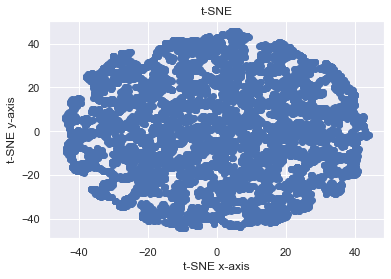

In [59]:
# Plotting reduced df_original using t-SNE
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('t-SNE x-axis')
plt.ylabel('t-SNE y-axis')
plt.title('t-SNE')
plt.show()